## ggparliament
ggparliament 包是为了使用 `ggplot2` 创建议会图表而开发的。该库还提供了一个示例数据集，其中包含了多个国家的选举数据。

在本教程中，我们将使用来自2016年俄罗斯国家杜马选举的数据来进行所有示例。需要注意的是，根据每个国家的不同，议会的类型也会不同，因此您应该根据您想要显示的数据使用相应的类型。可用的类型包括 "semicircle"（美国、法国、西班牙等）、"circle"、"opposing_benches"（英国）、"classroom" 和 "horsehoe"（澳大利亚、新西兰）。

这段文字描述了 `ggparliament` 包的功能以及如何在教程中使用2016年俄罗斯国家杜马选举的数据来进行演示。同时，它还提到了不同国家使用不同类型的议会图表，需要根据数据选择相应的类型。

<br>

## 一、准备数据


In [3]:
library(ggparliament)
library(tidyverse)

# Data
ru <- election_data %>%
  filter(country == "Russia" & year == 2016)

ru

year,country,house,party_long,party_short,seats,government,colour
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>
2016,Russia,Duma,Communist,CPRF,42,0,#D50000
2016,Russia,Duma,Liberal Democratic Party of Russia,LDPR,39,0,#2862B3
2016,Russia,Duma,A Just Russia,JR,23,0,#FAB512
2016,Russia,Duma,Rodina,Rodina,1,0,#EA484A
2016,Russia,Duma,Civic Platform,CPI,1,0,#641263
2016,Russia,Duma,Independent,Ind,1,0,#B4B4B4
2016,Russia,Duma,United Russia,UR,343,1,#0C2C84


<br><br>

## 二、议会图
### 2.1 半圆形议会图
要在 ggplot2 中使用 ggparliament 创建议会图表，您需要将数据转换为该软件包可以理解的格式。为此，您可以使用 parliament_data 函数，其中您可以指定原始数据集、议会类型及其行数、各党派的席位数以及其他参数。

然后，您可以将数据传递给 ggplot2，并使用 geom_parliament_seats() 函数。

请注意，该软件包提供了一个名为 theme_ggparliament 的自定义主题。

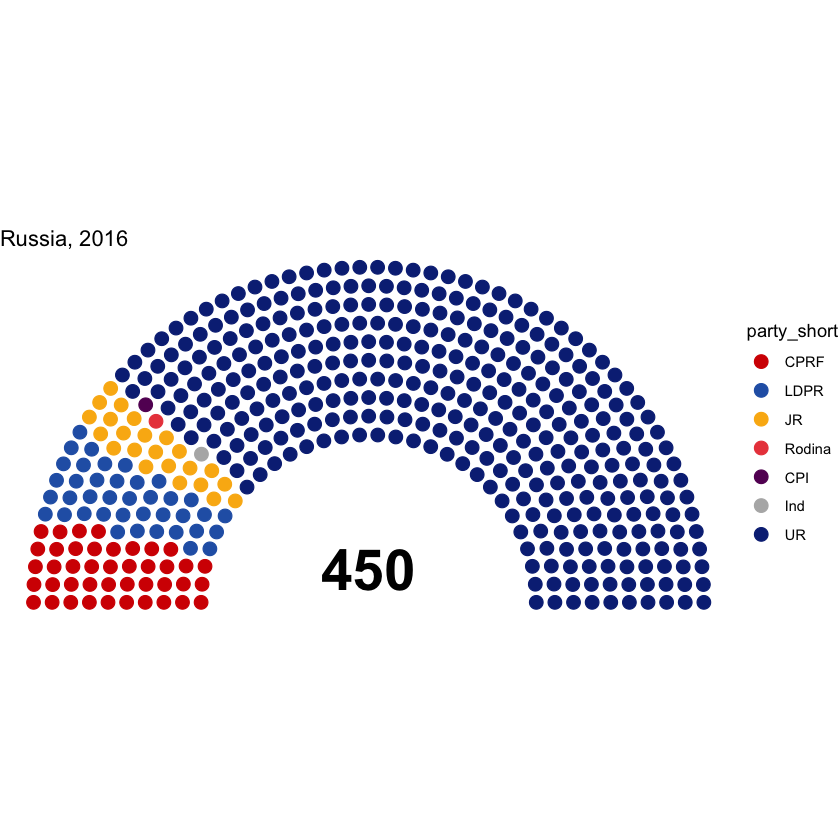

In [22]:
library(ggparliament)
library(tidyverse)

ru_semicircle <- parliament_data(election_data = ru,
                                 type = 'semicircle',#半圆形议会图
                                 parl_rows = 10, #议会图席位行数
                                 party_seats = ru$seats #各党派席位
                                )

ggplot(ru_semicircle, aes(x = x, y = y, colour = party_short)) +
  geom_parliament_seats() + 
  theme_ggparliament() +
  draw_totalseats(n = 450, type = "semicircle") +
  labs(title = "Russia, 2016") +
  scale_colour_manual(values = ru_semicircle$colour, 
                      limits = ru_semicircle$party_short) +
  coord_fixed()  # 设置纵横比为1:1

![](img/01-russia.png)

<br>

### 2.2 圆形议会图

如果你想要创建其他类型的议会，只需将不同的类型传递给 parliament_data 函数的 type 参数。在下面的示例中，我们正在创建一个圆形议会，这在一些国家中被使用。

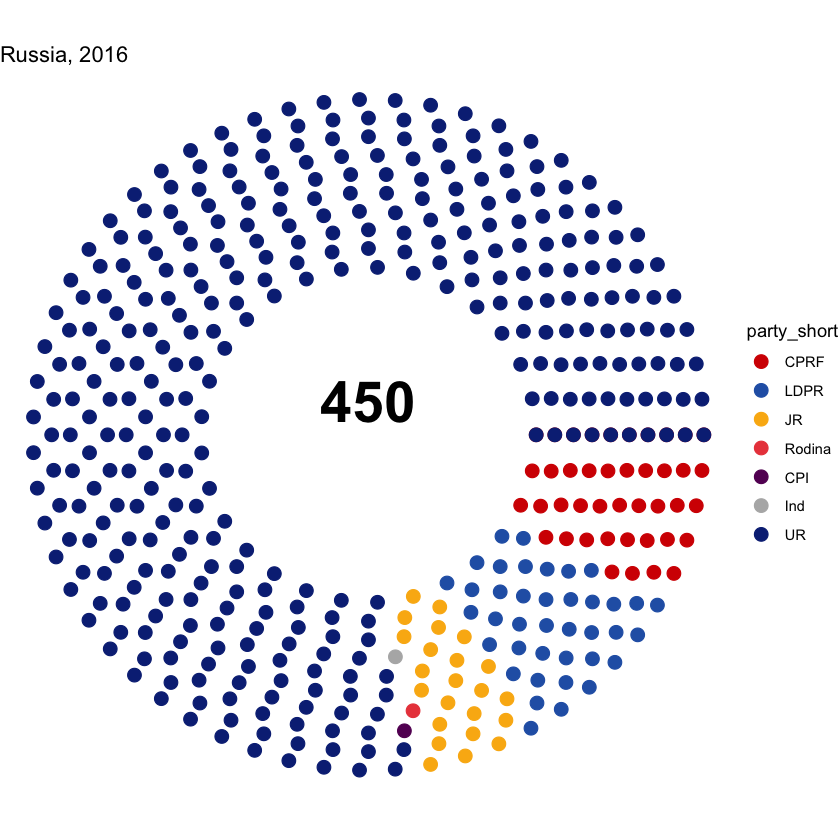

In [21]:
library(ggparliament)
# install.packages("tidyverse")
library(tidyverse)

ru_circle <- parliament_data(election_data = ru,
                             type = "circle",
                             parl_rows = 10,
                             party_seats = ru$seats)

ggplot(ru_circle, aes(x = x, y = y, colour = party_short)) +
  geom_parliament_seats() + 
  theme_ggparliament() +
  draw_totalseats(n = 450, type = "semicircle") +
  labs(title = "Russia, 2016") +
  scale_colour_manual(values = ru_circle$colour, 
                      limits = ru_circle$party_short) +
  coord_fixed()  # 设置纵横比为1:1

<br><br>

## 三、进一步自定义
该软件包提供了其他功能来自定义议会图表，例如标记政党、绘制多数门槛线、突出显示执政党等。

在以下示例中，我们将使用半圆图表，但您也可以将相同的函数用于其他类型的议会。

### 3.1 突出显示执政党并绘制多数门槛
geom_highlight_government 函数允许突出显示政府或控制立法机构的政党。此外，**draw_majoritythreshold** 函数允许添加表示多数门槛的线条。

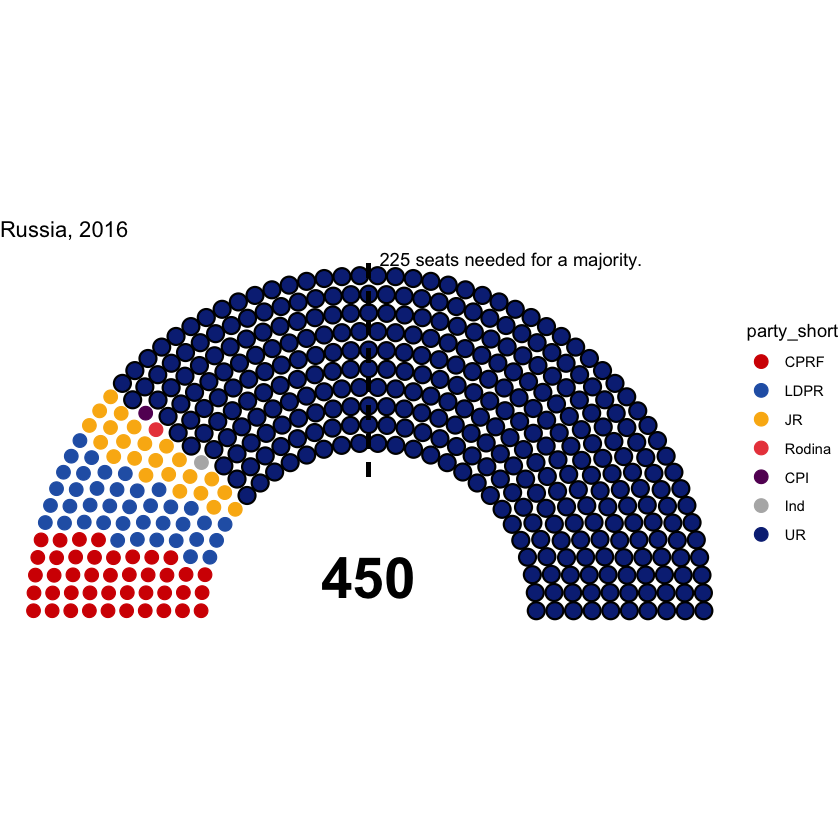

In [20]:
library(ggparliament)
library(tidyverse)

ru_semicircle <- parliament_data(election_data = ru,
                                 type = "semicircle",
                                 parl_rows = 10,
                                 party_seats = ru$seats)

ggplot(ru_semicircle, aes(x = x, y = y, colour = party_short)) +
  geom_parliament_seats() + 
  geom_highlight_government(government == 1) +
  draw_totalseats(n = 450, type = "semicircle") +
  draw_majoritythreshold(n = 225, label = TRUE, type = "semicircle") +
  theme_ggparliament() +
  labs(title = "Russia, 2016") +
  scale_colour_manual(values = ru_semicircle$colour, 
                      limits = ru_semicircle$party_short) +
   coord_fixed() 

### 3.2 议会柱状图
您还可以使用 geom_parliament_bar 函数添加一个议会柱状图，显示各政党在议会中的席位比例，如下所示。

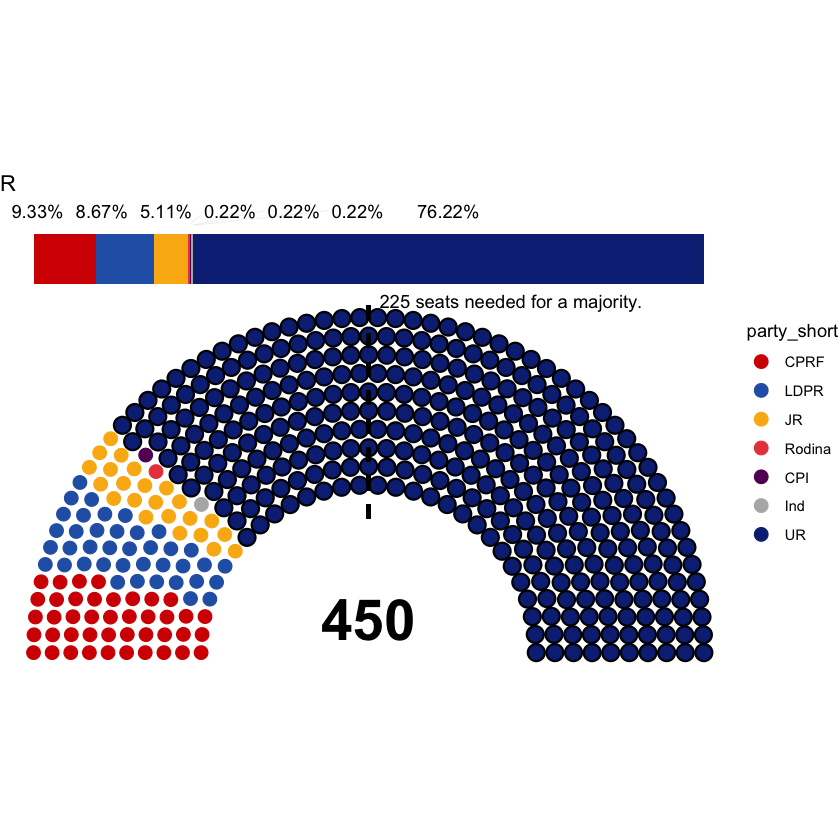

In [19]:
library(ggparliament)
library(tidyverse)

ru_semicircle <- parliament_data(election_data = ru,
                                 type = "semicircle",
                                 parl_rows = 10,
                                 party_seats = ru$seats)

ggplot(ru_semicircle, aes(x = x, y = y, colour = party_short)) +
  geom_parliament_seats() + 
  geom_highlight_government(government == 1) +
  geom_parliament_bar(colour = colour, party = party_long, label = TRUE) +
  draw_totalseats(n = 450, type = "semicircle") +
  draw_majoritythreshold(n = 225, label = TRUE, type = "semicircle") +
  theme_ggparliament() +
  labs(title = "R") +
  scale_colour_manual(values = ru_semicircle$colour, 
                      limits = ru_semicircle$party_short) +
  coord_fixed() 